# SPAM DETECTION 


Lecture de données

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
raw_mail_data = pd.read_csv('mail_data.csv')

In [5]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [6]:
raw_mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Remplacement des valeurs nulles par une chaîne vide

In [7]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [8]:
print(mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


Affichage des cinq premières lignes du DataFrame

In [10]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
mail_data.shape

(5572, 2)

# Label Encoding
Dans cette partie, nous allons étiqueter les courriers indésirables (spam) comme 0 et les courriers légitimes (ham) comme 1

In [12]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

- spam - 0

- ham - 1

Séparation des données en textes et étiquettes

In [14]:
X = mail_data['Message']

Y = mail_data['Category']

In [15]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [17]:
X.shape

(5572,)

In [16]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# Division des données
Dans cette partie, nous allons diviser les données en ensembles d'entraînement et de test

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# Feature Extraction

In [27]:
# convert Y_train and Y_test values as integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [32]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


# Training the Model

- Regression Logistique 

In [33]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

# Evaluation du modèle 

- prediction on training data :

In [34]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [35]:
print('L\'accuracy du modèle de Regression Logistique :', accuracy_on_training_data)

L'accuracy du modèle de Regression Logistique : 0.9670181736594121


- prediction on test data :

In [36]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [37]:
print('L\'accuracy du modèle de Regression Logistique :', accuracy_on_test_data)

L'accuracy du modèle de Regression Logistique : 0.9659192825112107


# Matrice de confusion et Courbe ROC

In [52]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [54]:
confusion = confusion_matrix(Y_test, y_pred)
print("Matrice de confusion:")
print(confusion)


Matrice de confusion:
[[132  23]
 [  0 960]]


In [55]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)


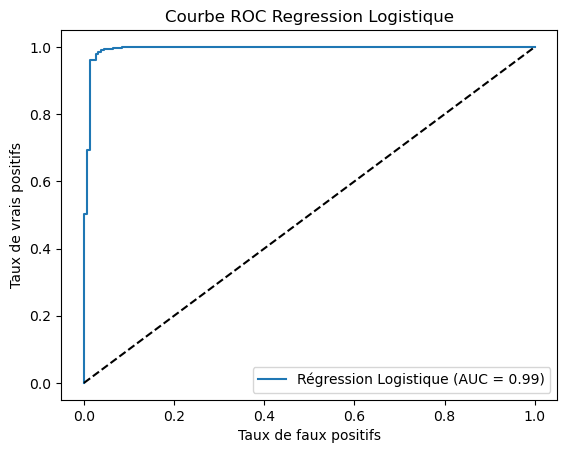

In [57]:
plt.plot(fpr, tpr, label='Régression Logistique (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC Regression Logistique')
plt.legend(loc='lower right')
plt.show()


# Système prédictif
Dans cette partie, nous allons faire la construction d'un système prédictif (ou d'un système de prédiction)

In [38]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# la prédiction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [39]:
input_mail = ["Dear Customer, We are pleased to inform you that you have won a special discount voucher for your next purchase. Hurry up and take advantage of this exclusive offer. Don't miss out!"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# la prédiction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


 - Cet e-mail est un exemple typique de spam où il est indiqué que le destinataire a gagné un voyage gratuit dans une destination exotique.

In [40]:
input_mail = ["Congratulations! You have won a free vacation trip to an exotic destination. Claim your prize now by clicking on the link below. Don't miss out on this incredible opportunity!"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# la prédiction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail


- Cet e-mail prétend que le destinataire a gagné un million de dollars à la loterie et demande des informations sensibles telles que les détails du compte bancaire.

In [41]:
input_mail = ["URGENT: You've won a million dollars in the lottery! Claim your prize immediately by providing your bank account details. Don't miss this once-in-a-lifetime opportunity!"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# la prédiction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail


# Conclusion 
Le modèle de régression logistique a obtenu une bonne précision sur les données de test, ce qui indique qu'il est capable de bien généraliser et de détecter les spams avec précision. Cependant, il est toujours important de continuer à améliorer et à ajuster le modèle pour obtenir de meilleurs résultats dans des scénarios réels.

# Modele SVM

In [59]:
from sklearn import svm

# Create an SVM model
model = svm.SVC()

# Train the SVM model
model.fit(X_train_features, Y_train)


SVC()

In [60]:
# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data with SVM:', accuracy_on_training_data)

# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data with SVM:', accuracy_on_test_data)


Accuracy on training data with SVM: 0.99798070450976
Accuracy on test data with SVM: 0.979372197309417


# Matrice de confusion et Courbe ROC

In [61]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [62]:
y_pred = model.predict(X_test_features)
confusion = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[132  23]
 [  0 960]]


In [63]:
y_pred_proba = model.decision_function(X_test_features)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
auc = roc_auc_score(Y_test, y_pred_proba)


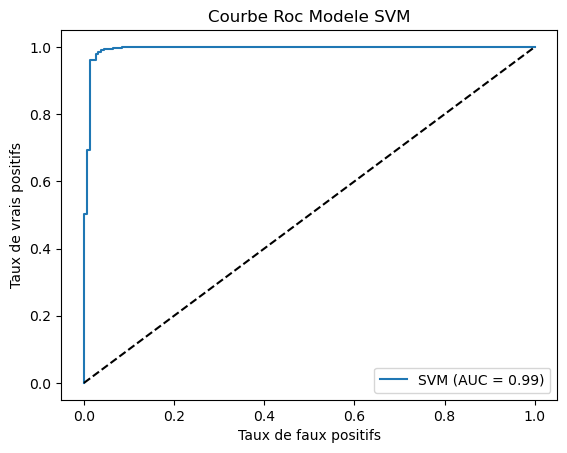

In [66]:
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe Roc Modele SVM')
plt.legend(loc='lower right')
plt.show()


# Système prédictif

- Cet e-mail prétend que le destinataire a gagné un million de dollars à la loterie et demande des informations sensibles telles que les détails du compte bancaire.

In [45]:
# Convert input text to feature vectors
input_mail = ["URGENT: You've won a million dollars in the lottery! Claim your prize immediately by providing your bank account details. Don't miss this once-in-a-lifetime opportunity!"]
input_data_features = feature_extraction.transform(input_mail)

# Make predictions
prediction = model.predict(input_data_features)

if prediction[0] == 1:
    print('Ham mail')
else:
    print('Spam mail')


Spam mail


# Conclusion 
En conclusion, le modèle SVM peut être un bon choix pour la détection de spam en raison de sa flexibilité, de sa capacité à gérer les données déséquilibrées et de sa précision potentielle. Cependant, il est important de prendre en compte les spécificités de votre ensemble de données et d'expérimenter avec différents modèles et paramètres pour obtenir les meilleurs résultats.